<a href="https://colab.research.google.com/github/ambitama-poddar/Machine-Learning-Practicals/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ResNet50 model

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Flatten ,Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip drive/My\ Drive/Colab\ Notebooks/archive.zip

Archive:  drive/My Drive/Colab Notebooks/archive.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg 

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/Training',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/Testing',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [5]:
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Adding custom Layers
x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
predictions = tf.keras.layers.Dense(4, activation="softmax")(x)
model = tf.keras.Model(inputs = model.input, outputs = predictions)
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

94765736/94765736 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [6]:
model_history = model.fit(
train_generator,
epochs = 10,
validation_data = validation_generator)

Epoch 1/10
90/90 [==============================] - 96s 405ms/step - loss: 5.2146 - accuracy: 0.7021 - val_loss: 1.6536 - val_accuracy: 0.2563
Epoch 2/10
90/90 [==============================] - 32s 354ms/step - loss: 0.5665 - accuracy: 0.8540 - val_loss: 1.4303 - val_accuracy: 0.2386
Epoch 3/10
90/90 [==============================] - 35s 385ms/step - loss: 0.3014 - accuracy: 0.9010 - val_loss: 1.4932 - val_accuracy: 0.2665
Epoch 4/10
90/90 [==============================] - 33s 366ms/step - loss: 0.1766 - accuracy: 0.9467 - val_loss: 1.9559 - val_accuracy: 0.2665
Epoch 5/10
90/90 [==============================] - 34s 373ms/step - loss: 0.1034 - accuracy: 0.9693 - val_loss: 2.7504 - val_accuracy: 0.3173
Epoch 6/10
90/90 [==============================] - 34s 381ms/step - loss: 0.0691 - accuracy: 0.9801 - val_loss: 4.1971 - val_accuracy: 0.2970
Epoch 7/10
90/90 [==============================] - 33s 371ms/step - loss: 0.1338 - accuracy: 0.9655 - val_loss: 3.1909 - val_accuracy: 0.3858

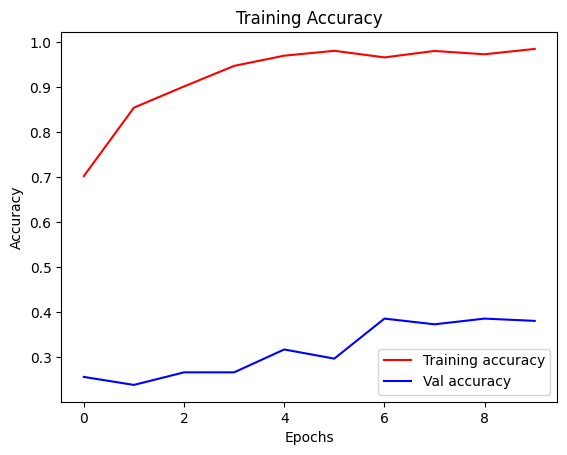

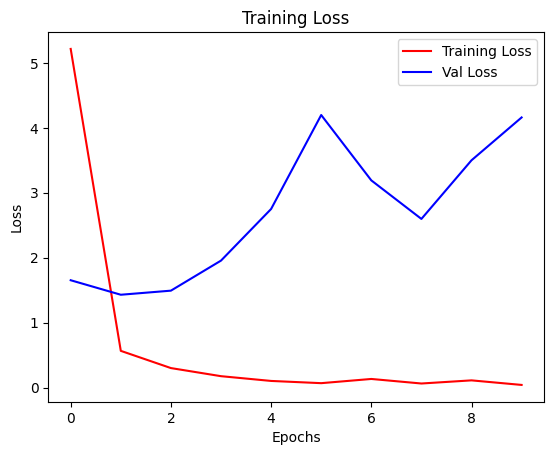

In [7]:

import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# InceptionV3Net

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/Training',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/Testing',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [9]:
model = tf.keras.applications.InceptionV3(weights='imagenet',include_top=False, input_shape = (300, 300, 3))
#Adding custom Layers
x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
predictions = tf.keras.layers.Dense(4, activation="softmax")(x)
model = tf.keras.Model(inputs = model.input, outputs = predictions)
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

87910968/87910968 [==============================] - 3s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                

In [10]:
model_history = model.fit(
train_generator,
epochs = 30,
validation_data = validation_generator)

Epoch 1/30
90/90 [==============================] - 103s 569ms/step - loss: 5.2986 - accuracy: 0.5373 - val_loss: 29.0315 - val_accuracy: 0.1421
Epoch 2/30
90/90 [==============================] - 43s 475ms/step - loss: 0.4453 - accuracy: 0.8380 - val_loss: 1.6517 - val_accuracy: 0.4721
Epoch 3/30
90/90 [==============================] - 43s 482ms/step - loss: 0.2909 - accuracy: 0.9098 - val_loss: 1.4638 - val_accuracy: 0.6066
Epoch 4/30
90/90 [==============================] - 44s 488ms/step - loss: 0.5406 - accuracy: 0.8885 - val_loss: 3.4300 - val_accuracy: 0.2817
Epoch 5/30
90/90 [==============================] - 43s 474ms/step - loss: 0.4267 - accuracy: 0.8868 - val_loss: 2.8787 - val_accuracy: 0.3629
Epoch 6/30
90/90 [==============================] - 43s 478ms/step - loss: 0.1763 - accuracy: 0.9467 - val_loss: 1.6533 - val_accuracy: 0.6650
Epoch 7/30
90/90 [==============================] - 44s 486ms/step - loss: 0.1015 - accuracy: 0.9666 - val_loss: 1.1574 - val_accuracy: 0.75

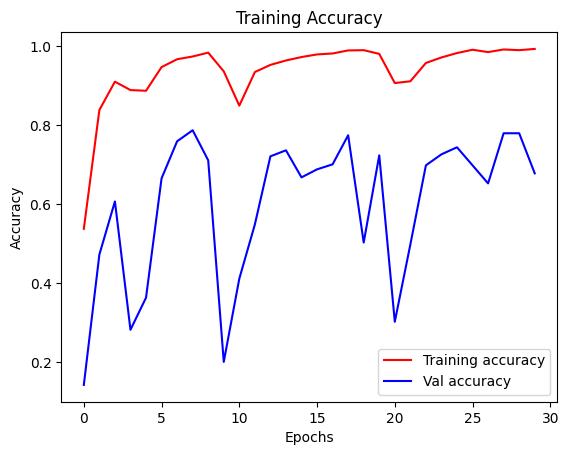

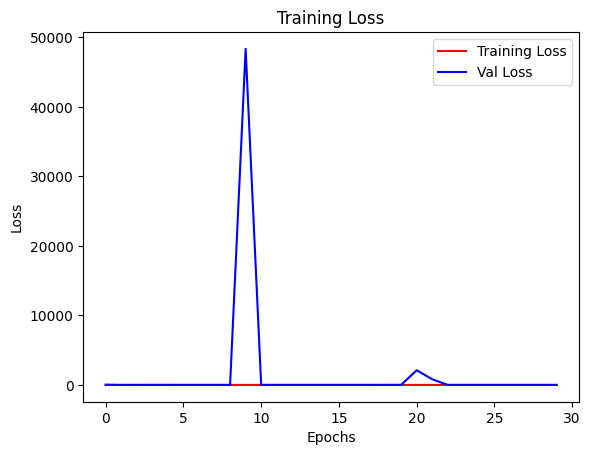

In [11]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# DenseNet121

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/Training',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/Testing',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [13]:
model = tf.keras.applications.DenseNet121(weights='imagenet',include_top=False, input_shape = (224, 224, 3))
#Adding custom Layers
x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
predictions = tf.keras.layers.Dense(4, activation="softmax")(x)
model = tf.keras.Model(inputs = model.input, outputs = predictions)
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

29084464/29084464 [==============================] - 2s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_3[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                           

In [14]:
model_history = model.fit(
train_generator,
epochs = 10,
validation_data = validation_generator)

Epoch 1/10
90/90 [==============================] - 124s 456ms/step - loss: 5.6388 - accuracy: 0.6080 - val_loss: 972490.1250 - val_accuracy: 0.2538
Epoch 2/10
90/90 [==============================] - 34s 383ms/step - loss: 0.4778 - accuracy: 0.8153 - val_loss: 185.0266 - val_accuracy: 0.3807
Epoch 3/10
90/90 [==============================] - 33s 369ms/step - loss: 0.3819 - accuracy: 0.8763 - val_loss: 5.6975 - val_accuracy: 0.2944
Epoch 4/10
90/90 [==============================] - 34s 377ms/step - loss: 2.1130 - accuracy: 0.5366 - val_loss: 314.3705 - val_accuracy: 0.2741
Epoch 5/10
90/90 [==============================] - 35s 386ms/step - loss: 0.7944 - accuracy: 0.6767 - val_loss: 2.1642 - val_accuracy: 0.3274
Epoch 6/10
90/90 [==============================] - 34s 374ms/step - loss: 0.6177 - accuracy: 0.7425 - val_loss: 1.9737 - val_accuracy: 0.4543
Epoch 7/10
90/90 [==============================] - 35s 389ms/step - loss: 0.5090 - accuracy: 0.8017 - val_loss: 1.6618 - val_accura

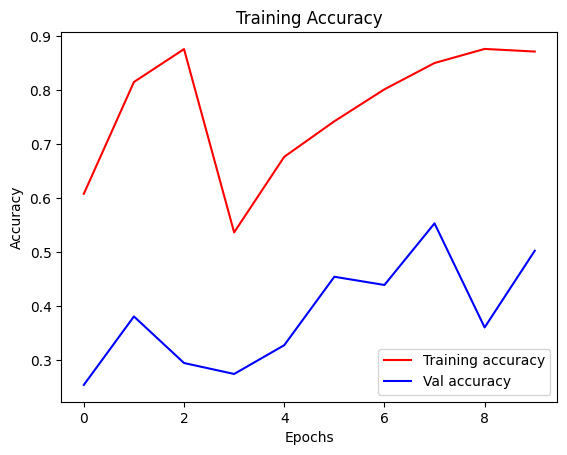

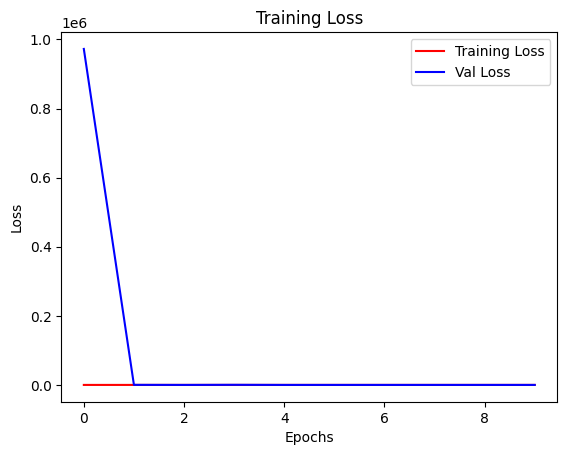

In [15]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()